<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/CO2_Danger_Threshold_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌍 CO₂ Decline Simulation and Biological Thresholds
This notebook models different CO₂ reduction scenarios and estimates when levels may fall into danger zones for ecosystems and human life.
We assume linear reductions from the current level of ~420 ppm (in 2025).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Parameters
start_year = 2025
start_co2 = 420  # ppm
reduction_rates = [1, 2, 3]  # ppm/year
thresholds = {
    "Warning Zone (300 ppm)": 300,
    "Critical Zone (180 ppm)": 180,
    "Biological Risk (150 ppm)": 150
}

In [2]:
# Generate data
years = list(range(start_year, 2201))
scenarios = {}

for rate in reduction_rates:
    co2_levels = [start_co2 - rate * (year - start_year) for year in years]
    co2_levels = [max(val, 0) for val in co2_levels]  # No negative CO₂
    scenarios[f"{rate} ppm/year"] = co2_levels

df = pd.DataFrame(scenarios, index=years)
df.head()

,1 ppm/year,2 ppm/year,3 ppm/year
2025,420,420,420
2026,419,418,417
2027,418,416,414
2028,417,414,411
2029,416,412,408


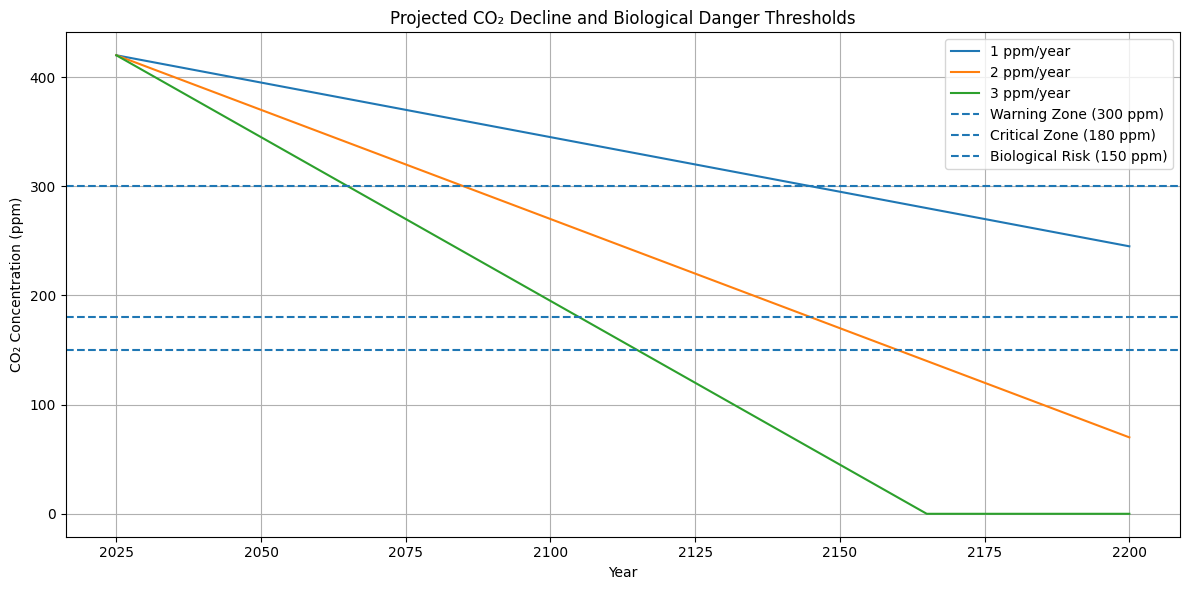

In [3]:
# Plot results
plt.figure(figsize=(12, 6))
for label in df.columns:
    plt.plot(df.index, df[label], label=label)

for label, value in thresholds.items():
    plt.axhline(value, linestyle='--', label=label)

plt.title("Projected CO₂ Decline and Biological Danger Thresholds")
plt.xlabel("Year")
plt.ylabel("CO₂ Concentration (ppm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
# Calculate danger years
danger_years = {}
for rate in reduction_rates:
    label = f"{rate} ppm/year"
    co2_series = df[label]
    for thresh_label, thresh_value in thresholds.items():
        crossed_years = co2_series[co2_series <= thresh_value]
        if not crossed_years.empty:
            danger_years[(label, thresh_label)] = crossed_years.index[0]

danger_df = pd.DataFrame(
    [(k[0], k[1], v) for k, v in danger_years.items()],
    columns=["Reduction Scenario", "Threshold", "Year Reached"]
)
danger_df

,Reduction Scenario,Threshold,Year Reached
0,1 ppm/year,Warning Zone (300 ppm),2145
1,2 ppm/year,Warning Zone (300 ppm),2085
2,2 ppm/year,Critical Zone (180 ppm),2145
3,2 ppm/year,Biological Risk (150 ppm),2160
4,3 ppm/year,Warning Zone (300 ppm),2065
5,3 ppm/year,Critical Zone (180 ppm),2105
6,3 ppm/year,Biological Risk (150 ppm),2115


## 📌 Conclusion
- If CO₂ levels drop below 300 ppm, plant growth and ecosystems could start to be stressed.
- At ~180 ppm or lower, many C3 plants struggle to perform photosynthesis.
- If aggressive CO₂ removal is not monitored carefully, we might reach biologically dangerous levels as early as the **2080s to 2140s**, depending on reduction speed.
- Science and policy must work **with feedback loops** to avoid overshooting the goal of climate safety.